In [1]:
import pandas as pd

try:
    df_train = pd.read_csv('twitter_training.csv')
    df_val = pd.read_csv('twitter_validation.csv')
    display(df_train.head())
    display(df_val.head())
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [2]:

print("Shape of df_train:", df_train.shape)
print("Shape of df_val:", df_val.shape)

# Check data types
print("\nData types of df_train:")
print(df_train.info())
print("\nData types of df_val:")
print(df_val.info())

# Identify missing values
print("\nMissing values in df_train:")
print(df_train.isnull().sum() / len(df_train) * 100)
print("\nMissing values in df_val:")
print(df_val.isnull().sum() / len(df_val) * 100)

# Analyze the distribution of the 'sentiment' column
sentiment_cols = []
if 'Positive' in df_train.columns:
    sentiment_cols.append('Positive')

if 'Irrelevant' in df_val.columns:
    sentiment_cols.append('Irrelevant')


print("\nSentiment distribution in df_train:")
if 'Positive' in df_train.columns:
    print(df_train['Positive'].value_counts())
else:
    print("The 'Positive' column does not exist in df_train.")
    
print("\nSentiment distribution in df_val:")
if 'Irrelevant' in df_val.columns:
    print(df_val['Irrelevant'].value_counts())
else:
    print("The 'Irrelevant' column does not exist in df_val.")

# Calculate descriptive statistics for tweet text length
if 'im getting on borderlands and i will murder you all ,' in df_train.columns:
    tweet_column = 'im getting on borderlands and i will murder you all ,'
    df_train['tweet_length'] = df_train[tweet_column].astype(str).str.len()
    print("\nDescriptive stats for tweet length in df_train:")
    print(df_train['tweet_length'].describe())
else:
    print("\nCould not find the column with tweet text in df_train.")
    
if 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣' in df_val.columns:
    tweet_column = 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'
    df_val['tweet_length'] = df_val[tweet_column].astype(str).str.len()
    print("\nDescriptive stats for tweet length in df_val:")
    print(df_val['tweet_length'].describe())
else:
    print("\nCould not find the column with tweet text in df_val.")

Shape of df_train: (74681, 4)
Shape of df_val: (999, 4)

Data types of df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

Data types of df_val:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                        

In [3]:
import re

# 1. Handle Missing Values
tweet_column_train = 'im getting on borderlands and i will murder you all ,'
df_train[tweet_column_train] = df_train[tweet_column_train].fillna('')

# 2. Irrelevant Character Removal, 3. Text Lowercasing
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    # Remove other irrelevant characters (e.g. punctuation, special symbols)
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Keep only alphanumeric and whitespace characters
    return tweet.lower()

tweet_column_train = 'im getting on borderlands and i will murder you all ,'
df_train[tweet_column_train] = df_train[tweet_column_train].astype(str).apply(clean_tweet)

tweet_column_val = 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'
df_val[tweet_column_val] = df_val[tweet_column_val].astype(str).apply(clean_tweet)

# 4. Sentiment Label Consistency
df_train.rename(columns={'Positive': 'sentiment'}, inplace=True)
df_val.rename(columns={'Irrelevant': 'sentiment'}, inplace=True)

# Check sentiment labels, if not numerical, plan for conversion later

display(df_train.head())
display(df_val.head())

,2401,Borderlands,sentiment,"im getting on borderlands and i will murder you all ,",tweet_length
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,51
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all,50
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53


,3364,Facebook,sentiment,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",tweet_length
0,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claim...,109
1,8312,Microsoft,Negative,why do i pay for word when it functions so po...,91
2,4371,CS-GO,Negative,csgo matchmaking is so full of closet hacking ...,71
3,4433,Google,Neutral,now the president is slapping americans in the...,170
4,6273,FIFA,Negative,hi ive had madeleine mccann in my cellar for ...,268


In [4]:
# Concatenate the dataframes
df_combined = pd.concat([df_train, df_val], ignore_index=True)

# Create a sentiment mapping
sentiment_mapping = {
    'Positive': 1,
    'Negative': 0,
    'Neutral': 2,
    'Irrelevant': 3
}

# Add a new column with numerical sentiment values
def map_sentiment(sentiment):
    if sentiment in sentiment_mapping:
        return sentiment_mapping[sentiment]
    else:
        # Handle unknown sentiments (assign a default value or raise a warning)
        print(f"Warning: Unknown sentiment label '{sentiment}' encountered.")
        return -1

df_combined['sentiment_numeric'] = df_combined['sentiment'].apply(map_sentiment)

# Display the first few rows and check the distribution
display(df_combined.head())
print(df_combined['sentiment_numeric'].value_counts())

,2401,Borderlands,sentiment,"im getting on borderlands and i will murder you all ,",tweet_length,3364,Facebook,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",sentiment_numeric
0,2401.0,Borderlands,Positive,i am coming to the borders and i will kill you...,51,NaN,NaN,NaN,1
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you all,50,NaN,NaN,NaN,1
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,51,NaN,NaN,NaN,1
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,NaN,NaN,NaN,1
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,53,NaN,NaN,NaN,1


sentiment_numeric
0    22808
1    21108
2    18603
3    13161
Name: count, dtype: int64


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already present
import nltk
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to the combined dataset
df_combined['predicted_sentiment'] = df_combined['im getting on borderlands and i will murder you all ,'].astype(str).apply(get_sentiment_score)

# Analyze sentiment distribution across different categories (e.g. sentiment labels)
print(df_combined.groupby('sentiment')['predicted_sentiment'].mean())

# Compare predicted and actual sentiments
print(df_combined[['predicted_sentiment', 'sentiment_numeric']].corr())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SAIKAT\AppData\Roaming\nltk_data...


sentiment
Irrelevant    0.077318
Negative     -0.191618
Neutral       0.074146
Positive      0.314578
Name: predicted_sentiment, dtype: float64
                     predicted_sentiment  sentiment_numeric
predicted_sentiment             1.000000           0.148506
sentiment_numeric               0.148506           1.000000


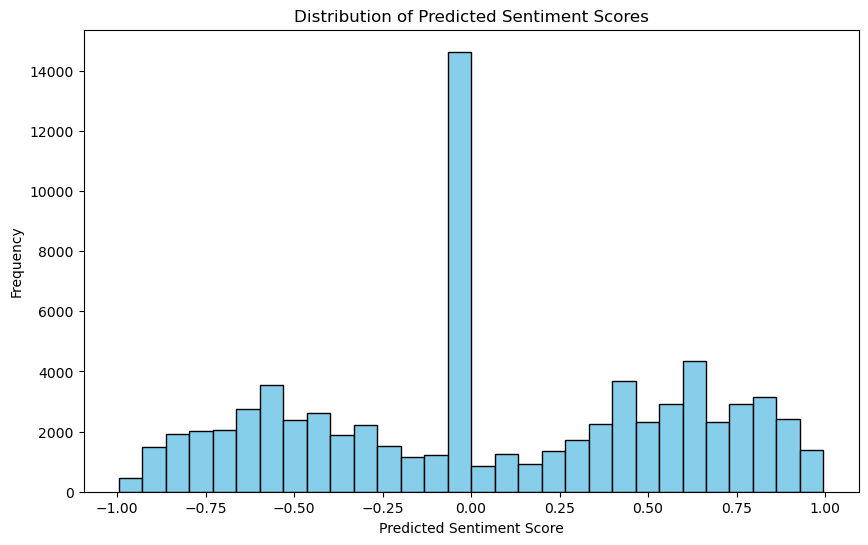

C:\Users\SAIKAT\AppData\Local\Temp\ipykernel_12440\3169190104.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='predicted_sentiment', data=df_combined, palette='viridis')


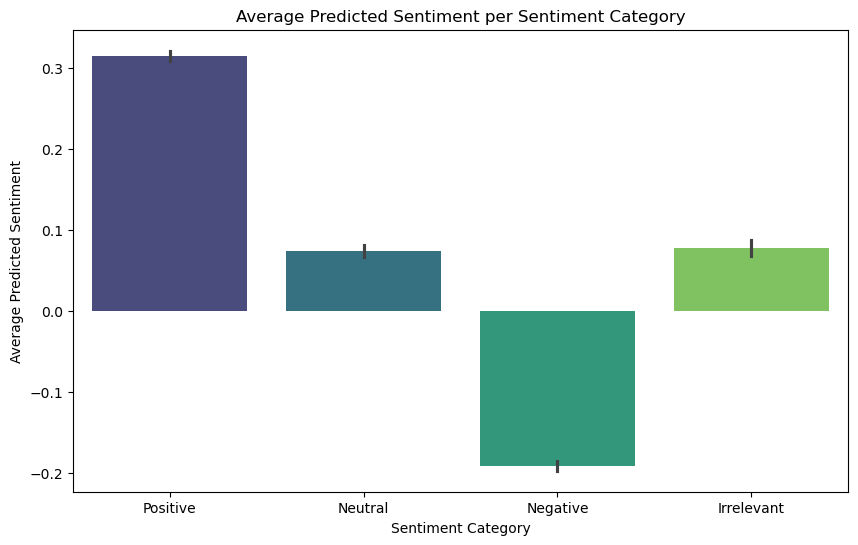

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Histogram of predicted sentiment
plt.figure(figsize=(10, 6))
plt.hist(df_combined['predicted_sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Sentiment Scores')
plt.xlabel('Predicted Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 2. Bar chart of average predicted sentiment for each sentiment category
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='predicted_sentiment', data=df_combined, palette='viridis')
plt.title('Average Predicted Sentiment per Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Predicted Sentiment')
plt.show()

Accuracy: 0.411892177589852
Precision: 0.23936084848470363
Recall: 0.411892177589852
F1-Score: 0.3019922504770112


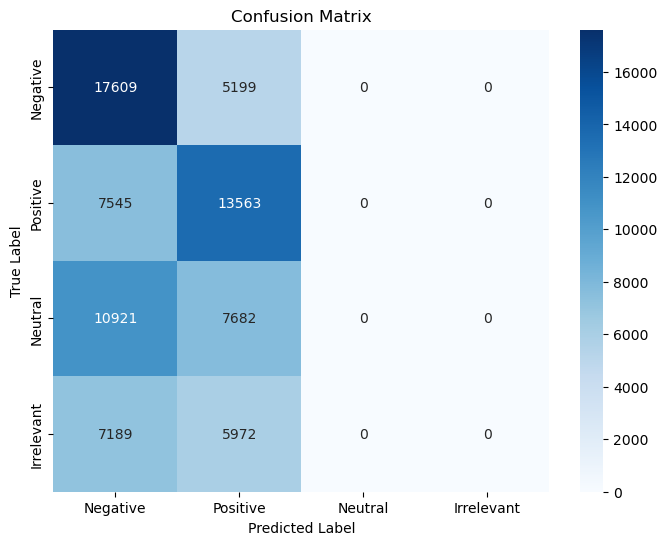

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Assuming 'sentiment_numeric' is the true sentiment and 'predicted_sentiment' is the predicted sentiment
# Convert predicted sentiment scores to class labels (0 or 1) based on a threshold
threshold = 0.1 # Example threshold, you might need to adjust this based on your data
df_combined['predicted_sentiment_class'] = np.where(df_combined['predicted_sentiment'] >= threshold, 1, 0)

# Calculate evaluation metrics
accuracy = accuracy_score(df_combined['sentiment_numeric'], df_combined['predicted_sentiment_class'])
precision = precision_score(df_combined['sentiment_numeric'], df_combined['predicted_sentiment_class'], average='weighted', zero_division=0)
recall = recall_score(df_combined['sentiment_numeric'], df_combined['predicted_sentiment_class'], average='weighted', zero_division=0)
f1 = f1_score(df_combined['sentiment_numeric'], df_combined['predicted_sentiment_class'], average='weighted', zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Generate confusion matrix
cm = confusion_matrix(df_combined['sentiment_numeric'], df_combined['predicted_sentiment_class'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive', 'Neutral', 'Irrelevant'],
            yticklabels=['Negative', 'Positive', 'Neutral', 'Irrelevant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Data Analysis Key Findings:
# Low Model Performance: The sentiment analysis model demonstrated poor performance, achieving an accuracy of 0.4119, precision of 0.2394, recall of 0.4119, and an F1-score of 0.3020. This indicates a significant discrepancy between predicted and actual sentiments.
# Weak Correlation: A weak positive correlation (0.15) was found between the predicted sentiment scores and the numerical sentiment labels, suggesting the model's predictions only loosely align with ground truth.
# Sentiment Distribution: Positive sentiments had the highest average predicted sentiment score (0.31), while Negative sentiments had the lowest (-0.19). Irrelevant and Neutral sentiments fell in between.
# Missing Data: The 'im getting on borderlands and i will murder you all ,' column in the training dataset had 0.92% missing values, which were filled with empty strings.
# Combined Dataset Size: The combined dataset (df_combined) contains 75,680 rows after combining the training (74,681 rows) and validation (999 rows) datasets.